

---

Sentiment Analysis on

*   Individual tweets of PM candidates
*   General tweets regarding election


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
#cf.go_offline()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for polarity score

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
#for bert 

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# Vader sentiment Analyzer

analyser = SentimentIntensityAnalyzer()

def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Graph_theory_and_social_networks/final_data/IndianElection19TwitterData.csv',index_col=0)
df

Date             User  \
0       2019-05-18 23:50:47+00:00  advosushildixit   
1       2019-05-18 23:20:00+00:00    airnewsalerts   
2       2019-05-18 23:00:03+00:00           jiaeur   
3       2019-05-18 22:53:54+00:00    PVenkatGandhi   
4       2019-05-18 22:20:48+00:00      TheNirbhay1   
...                           ...              ...   
142561  2019-03-06 10:18:02+00:00       RAMANKAIRA   
142562  2019-03-06 10:11:43+00:00       RAMANKAIRA   
142563  2019-01-24 12:57:48+00:00          thota_J   
142564  2019-01-24 12:48:37+00:00          thota_J   
142565  2019-01-24 12:47:55+00:00          thota_J   

                                                    Tweet  
0       @anjanaomkashyap I am seeing you as future #bj...  
1       Trinamool Congress Sitting MP Abhishek Banerje...  
2       #LokSabhaElections2019 \n23rd May 2019 will re...  
3       #LokSabhaElections2019 \n23rd May 2019 will re...  
4       PM Modi creates a new record of being the only...  
...                                                   ...  
142561  @mayankgandhi04 @mallesh_2004 Early morning #p...  
142562  @DrKumarVishwas Early morning #political move ...  
142563  CVoter predicts seat share for upcoming #LokSa...  
142564  CVoter predicts seat share for upcoming #LokSa...  
142565  CVoter predicts seat share for upcoming #LokSa...  

[142566 rows x 3 columns]

# Sentiment Analysis of Modi and Rahul Gandhi's Tweets

## Sentiment For Modi's Tweets

In [ ]:
df_Modi = pd.read_csv("/content/drive/MyDrive/Graph_theory_and_social_networks/final_data/tweetsModi.csv",index_col=0)
df_Modi

Date          User  \
0   2019-05-12 01:17:12+00:00  narendramodi   
1   2019-05-09 02:00:26+00:00  narendramodi   
2   2019-05-08 13:41:51+00:00  narendramodi   
3   2019-05-06 01:18:46+00:00  narendramodi   
4   2019-04-29 01:18:03+00:00  narendramodi   
..                        ...           ...   
60  2019-02-09 12:23:13+00:00  narendramodi   
61  2019-02-08 01:57:45+00:00  narendramodi   
62  2019-01-31 11:15:16+00:00  narendramodi   
63  2019-01-25 06:31:18+00:00  narendramodi   
64  2019-01-19 16:41:47+00:00  narendramodi   

                                                Tweet  
0   Yet another phase of the 2019 Lok Sabha electi...  
1   Will be addressing five rallies today. \n\nLoo...  
2   Delhi has always given great love and affectio...  
3   Requesting all those voting in today’s fifth p...  
4   Another phase of the General Elections begins ...  
..                                                ...  
60  During Congress rule, the headlines from the N...  
61  In the afternoon, I will address a public meet...  
62  I thank the people of Jind for blessing @BJP4H...  
63  I urge people from all walks of life to create...  
64  They got together in Kolkata with no agenda bu...  

[65 rows x 3 columns]

In [ ]:
#from nltk.corpus import stopwords
#import nltk
# nltk.download('stopwords')
# stop = stopwords.words('english')
# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [ ]:
df_Modi['Tweet'] = df_Modi['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# import string

# def remove_punctuations(text):
#     for punctuation in string.punctuation:
#         text = text.replace(punctuation, '')
#     return text

# df_Modi['Tweet'] = df_Modi['Tweet'].apply(remove_punctuations)

### Bert

In [ ]:
df_Modi['FinalEmotion'] = df_Modi['Tweet'].apply(lambda x: sentiment_score(x))
df_Modi['FinalEmotion']=df_Modi['FinalEmotion'].apply(lambda x : 'Pos' if x==5 else ('Neg' if x==1 else 'Neu'))
df_Modi

Date          User  \
0   2019-05-12 01:17:12+00:00  narendramodi   
1   2019-05-09 02:00:26+00:00  narendramodi   
2   2019-05-08 13:41:51+00:00  narendramodi   
3   2019-05-06 01:18:46+00:00  narendramodi   
4   2019-04-29 01:18:03+00:00  narendramodi   
..                        ...           ...   
60  2019-02-09 12:23:13+00:00  narendramodi   
61  2019-02-08 01:57:45+00:00  narendramodi   
62  2019-01-31 11:15:16+00:00  narendramodi   
63  2019-01-25 06:31:18+00:00  narendramodi   
64  2019-01-19 16:41:47+00:00  narendramodi   

                                                Tweet    pos    neg    neu  \
0   Yet phase 2019 Lok Sabha elections here! Urgin...  0.197  0.000  0.803   
1   Will addressing rallies today. Looking forward...  0.304  0.000  0.696   
2   Delhi given great love affection BJP. In short...  0.461  0.000  0.539   
3   Requesting voting today’s fifth phase 2019 Lok...  0.333  0.000  0.667   
4   Another phase General Elections begins today. ...  0.183  0.000  0.817   
..                                                ...    ...    ...    ...   
60  During Congress rule, headlines Northeast indi...  0.246  0.156  0.599   
61  In afternoon, I address public meeting Mainagu...  0.178  0.000  0.822   
62  I thank people Jind blessing @BJP4Haryana. Thi...  0.500  0.000  0.500   
63  I urge people walks life create awareness vote...  0.215  0.000  0.785   
64  They got Kolkata agenda stop BJP. They talk de...  0.322  0.062  0.616   

   FinalEmotion  
0           Neu  
1           Pos  
2           Pos  
3           Neu  
4           Neu  
..          ...  
60          Neg  
61          Pos  
62          Pos  
63          Pos  
64          Neg  

[65 rows x 7 columns]

In [ ]:
df_Modi['FinalEmotion'].value_counts()

Pos    52
Neg     7
Neu     6
Name: FinalEmotion, dtype: int64

Text(0.5, 1.0, "Narendra Modi's Personal Tweets")

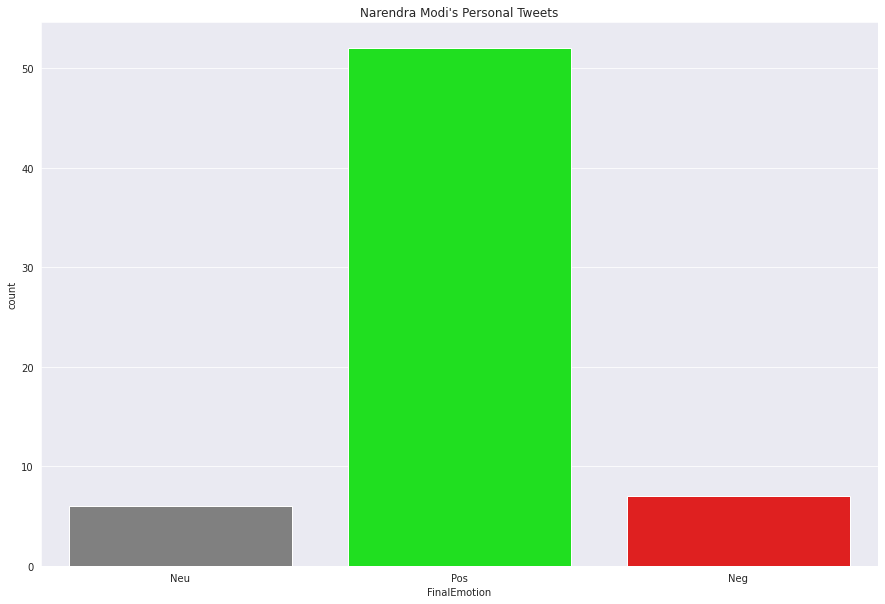

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=df_Modi['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Narendra Modi\'s Personal Tweets')

### Vader Sentiment

In [ ]:
df_Modi.drop('FinalEmotion',axis=1, inplace=True)

In [ ]:
#  By Using Vader sentiment Analyzer

analyser = SentimentIntensityAnalyzer()

def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

# Applying on tweets
df_Modi['pos'] = df_Modi['Tweet'].apply(lambda x :pos(x))
df_Modi['neg'] = df_Modi['Tweet'].apply(lambda x :neg(x))
df_Modi['neu'] = df_Modi['Tweet'].apply(lambda x :neu(x))

# Final Emotions
ggez=[]
for i in range(0,65):
    ggez.append(max(df_Modi['pos'][i],df_Modi['neu'][i],df_Modi['neg'][i]))

df_Modi['FinalEmotion']=ggez
for i in range(0,65):
    if df_Modi['FinalEmotion'][i]==df_Modi['pos'][i]:
        df_Modi['FinalEmotion'][i]='positive'
    elif df_Modi['FinalEmotion'][i]==df_Modi['negu'][i]:
        df_Modi['FinalEmotion'][i]='negative' 
    elif df_Modi['FinalEmotion'][i]==df_Modi['neu'][i]:
        df_Modi['FinalEmotion'][i]='neutral'
df_Modi

Date          User  \
0   2019-05-12 01:17:12+00:00  narendramodi   
1   2019-05-09 02:00:26+00:00  narendramodi   
2   2019-05-08 13:41:51+00:00  narendramodi   
3   2019-05-06 01:18:46+00:00  narendramodi   
4   2019-04-29 01:18:03+00:00  narendramodi   
..                        ...           ...   
60  2019-02-09 12:23:13+00:00  narendramodi   
61  2019-02-08 01:57:45+00:00  narendramodi   
62  2019-01-31 11:15:16+00:00  narendramodi   
63  2019-01-25 06:31:18+00:00  narendramodi   
64  2019-01-19 16:41:47+00:00  narendramodi   

                                                Tweet    pos    neg    neu  \
0   Yet phase 2019 Lok Sabha elections here! Urgin...  0.197  0.000  0.803   
1   Will addressing rallies today. Looking forward...  0.304  0.000  0.696   
2   Delhi given great love affection BJP. In short...  0.461  0.000  0.539   
3   Requesting voting today’s fifth phase 2019 Lok...  0.333  0.000  0.667   
4   Another phase General Elections begins today. ...  0.183  0.000  0.817   
..                                                ...    ...    ...    ...   
60  During Congress rule, headlines Northeast indi...  0.246  0.156  0.599   
61  In afternoon, I address public meeting Mainagu...  0.178  0.000  0.822   
62  I thank people Jind blessing @BJP4Haryana. Thi...  0.500  0.000  0.500   
63  I urge people walks life create awareness vote...  0.215  0.000  0.785   
64  They got Kolkata agenda stop BJP. They talk de...  0.322  0.062  0.616   

   FinalEmotion  
0       neutral  
1       neutral  
2       neutral  
3       neutral  
4       neutral  
..          ...  
60      neutral  
61      neutral  
62     positive  
63      neutral  
64      neutral  

[65 rows x 7 columns]

In [ ]:
df_Modi['FinalEmotion'].value_counts()

neutral     58
positive     7
Name: FinalEmotion, dtype: int64

### TextBlob

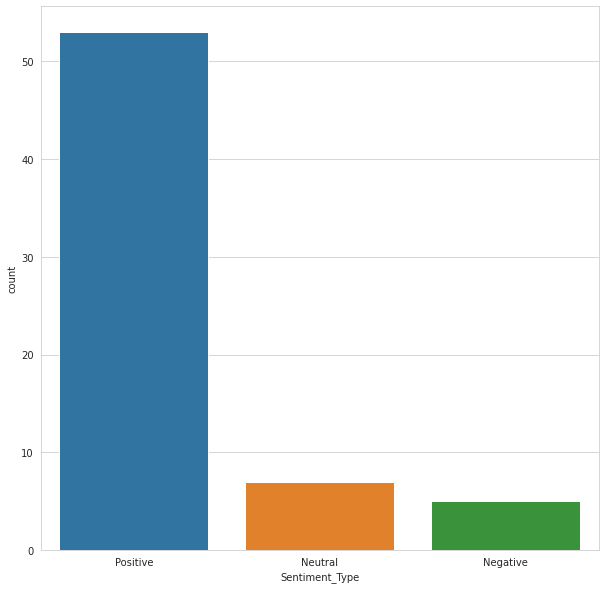

In [ ]:
# By Textblob

from textblob import TextBlob

bloblist_desc = list()

twit=df_Modi['Tweet'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

## Sentiment For Rahul Gandhi's Tweets

In [ ]:
#Rahul G
df_RG = pd.read_csv('/content/drive/MyDrive/Graph_theory_and_social_networks/final_data/tweetsRG.csv',index_col=0)
df_RG

Date         User  \
0   2019-05-18 06:59:40+00:00  RahulGandhi   
1   2019-05-17 12:39:41+00:00  RahulGandhi   
2   2019-05-14 10:11:18+00:00  RahulGandhi   
3   2019-05-09 16:01:12+00:00  RahulGandhi   
4   2019-05-05 05:45:31+00:00  RahulGandhi   
..                        ...          ...   
59  2019-01-09 15:29:53+00:00  RahulGandhi   
60  2019-01-08 10:02:46+00:00  RahulGandhi   
61  2019-01-03 06:41:57+00:00  RahulGandhi   
62  2019-01-02 15:21:59+00:00  RahulGandhi   
63  2019-01-01 02:55:42+00:00  RahulGandhi   

                                                Tweet  
0   Greetings &amp; Best Wishes on the auspicious ...  
1   Congratulations Modi Ji. Excellent Press Confe...  
2   🇮🇳 🇮🇳 🇮🇳 I'm pushing for a new language in pol...  
3   Dear Mr Modi,\n\nYour recent statements, inter...  
4   Modi Ji,\n\nThe battle is over. Your Karma awa...  
..                                                ...  
59  With all due respect Modi Ji, in our culture r...  
60  The truth of Rafale will destroy Mr Modi. It’s...  
61  So it seems our PM has fled Parliament &amp; h...  
62  Tomorrow, the PM faces an Open Book #RafaleDea...  
63                  I wish you all, a Happy New Year!  

[64 rows x 3 columns]

In [ ]:
df_RG['Tweet'] = df_RG['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Bert

In [ ]:
df_RG['FinalEmotion'] = df_RG['Tweet'].apply(lambda x: sentiment_score(x))
df_RG['FinalEmotion']=df_RG['FinalEmotion'].apply(lambda x : 'Pos' if x==5 else ('Neg' if x==1 else 'Neu'))
df_RG

Date         User  \
0   2019-05-18 06:59:40+00:00  RahulGandhi   
1   2019-05-17 12:39:41+00:00  RahulGandhi   
2   2019-05-14 10:11:18+00:00  RahulGandhi   
3   2019-05-09 16:01:12+00:00  RahulGandhi   
4   2019-05-05 05:45:31+00:00  RahulGandhi   
..                        ...          ...   
59  2019-01-09 15:29:53+00:00  RahulGandhi   
60  2019-01-08 10:02:46+00:00  RahulGandhi   
61  2019-01-03 06:41:57+00:00  RahulGandhi   
62  2019-01-02 15:21:59+00:00  RahulGandhi   
63  2019-01-01 02:55:42+00:00  RahulGandhi   

                                                Tweet FinalEmotion  
0   Greetings &amp; Best Wishes auspicious occasio...          Pos  
1   Congratulations Modi Ji. Excellent Press Confe...          Pos  
2   🇮🇳 🇮🇳 🇮🇳 I'm pushing new language politics. Le...          Neg  
3   Dear Mr Modi, Your recent statements, intervie...          Neu  
4   Modi Ji, The battle over. Your Karma awaits yo...          Pos  
..                                                ...          ...  
59  With respect Modi Ji, culture respect women be...          Neg  
60  The truth Rafale destroy Mr Modi. It’s questio...          Neg  
61  So PM fled Parliament &amp; open book Rafale e...          Neg  
62  Tomorrow, PM faces Open Book #RafaleDeal Exam ...          Neg  
63                        I wish all, Happy New Year!          Pos  

[64 rows x 4 columns]

In [ ]:
df_RG.FinalEmotion.value_counts()

Pos    31
Neg    31
Neu     2
Name: FinalEmotion, dtype: int64

Text(0.5, 1.0, "Rahul Gandhi's Personal Tweets")

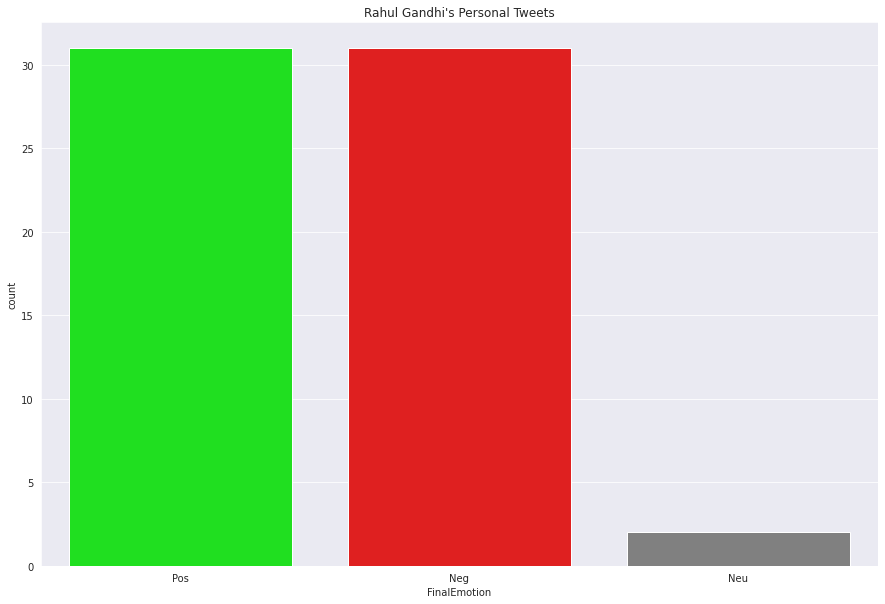

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=df_RG['FinalEmotion'],palette=['#00FF00',"#FF0000",'#808080'])
ax.set_title('Rahul Gandhi\'s Personal Tweets')

### Vader Sentiment

In [ ]:
df_RG['pos'] = df_RG['Tweet'].apply(lambda x :pos(x))
df_RG['neg'] = df_RG['Tweet'].apply(lambda x :neg(x))
df_RG['neu'] = df_RG['Tweet'].apply(lambda x :neu(x))

ggez=[]
for i in range(0,64):
    ggez.append(max(df_RG['pos'][i],df_RG['neu'][i],df_RG['neg'][i]))

df_RG['FinalEmotion']=ggez

for i in range(0,64):
    if df_RG['FinalEmotion'][i]==df_RG['pos'][i]:
        df_RG['FinalEmotion'][i]='positive'
    elif df_RG['FinalEmotion'][i]==df_RG['neg'][i]:
        df_RG['FinalEmotion'][i]='negative' 
    elif df_RG['FinalEmotion'][i]==df_RG['neu'][i]:
        df_RG['FinalEmotion'][i]='neutral'

In [ ]:
df_RG.head()

Date         User  \
0  2019-05-18 06:59:40+00:00  RahulGandhi   
1  2019-05-17 12:39:41+00:00  RahulGandhi   
2  2019-05-14 10:11:18+00:00  RahulGandhi   
3  2019-05-09 16:01:12+00:00  RahulGandhi   
4  2019-05-05 05:45:31+00:00  RahulGandhi   

                                               Tweet    pos    neg    neu  \
0  Greetings &amp; Best Wishes on the auspicious ...  0.551  0.000  0.449   
1  Congratulations Modi Ji. Excellent Press Confe...  0.306  0.065  0.628   
2  🇮🇳 🇮🇳 🇮🇳 I'm pushing for a new language in pol...  0.084  0.326  0.590   
3  Dear Mr Modi,\n\nYour recent statements, inter...  0.241  0.057  0.703   
4  Modi Ji,\n\nThe battle is over. Your Karma awa...  0.337  0.065  0.599   

  FinalEmotion  
0     positive  
1      neutral  
2      neutral  
3      neutral  
4      neutral

In [ ]:
df_RG['FinalEmotion'].value_counts()

neutral     60
positive     4
Name: FinalEmotion, dtype: int64

### Using TextBlob

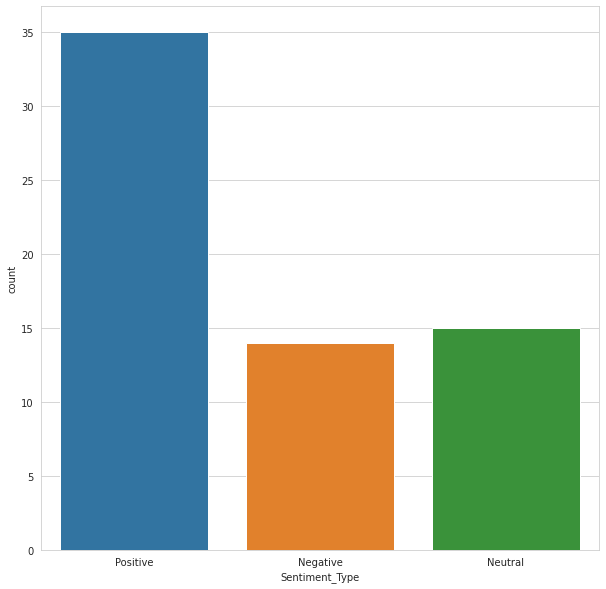

In [ ]:
# 

bloblist_desc = list()

twit=df_RG['Tweet'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

### Comparative analysis of the tweets from Namo & RaGa

In [ ]:
# Combining Both The Dataframes 

dfNR=pd.concat([df_Modi,df_RG], axis=0)
dfNR=dfNR.reset_index(drop=True)
dfNR

Date          User  \
0    2019-05-12 01:17:12+00:00  narendramodi   
1    2019-05-09 02:00:26+00:00  narendramodi   
2    2019-05-08 13:41:51+00:00  narendramodi   
3    2019-05-06 01:18:46+00:00  narendramodi   
4    2019-04-29 01:18:03+00:00  narendramodi   
..                         ...           ...   
124  2019-01-09 15:29:53+00:00   RahulGandhi   
125  2019-01-08 10:02:46+00:00   RahulGandhi   
126  2019-01-03 06:41:57+00:00   RahulGandhi   
127  2019-01-02 15:21:59+00:00   RahulGandhi   
128  2019-01-01 02:55:42+00:00   RahulGandhi   

                                                 Tweet    pos    neg    neu  \
0    Yet another phase of the 2019 Lok Sabha electi...  0.126  0.000  0.874   
1    Will be addressing five rallies today. \n\nLoo...  0.231  0.000  0.769   
2    Delhi has always given great love and affectio...  0.308  0.000  0.692   
3    Requesting all those voting in today’s fifth p...  0.226  0.000  0.774   
4    Another phase of the General Elections begins ...  0.118  0.000  0.882   
..                                                 ...    ...    ...    ...   
124  With all due respect Modi Ji, in our culture r...  0.248  0.074  0.679   
125  The truth of Rafale will destroy Mr Modi. It’s...  0.142  0.080  0.778   
126  So it seems our PM has fled Parliament &amp; h...  0.164  0.000  0.836   
127  Tomorrow, the PM faces an Open Book #RafaleDea...  0.000  0.000  1.000   
128                  I wish you all, a Happy New Year!  0.527  0.000  0.473   

    FinalEmotion  
0        neutral  
1        neutral  
2        neutral  
3        neutral  
4        neutral  
..           ...  
124      neutral  
125      neutral  
126      neutral  
127      neutral  
128     positive  

[129 rows x 7 columns]

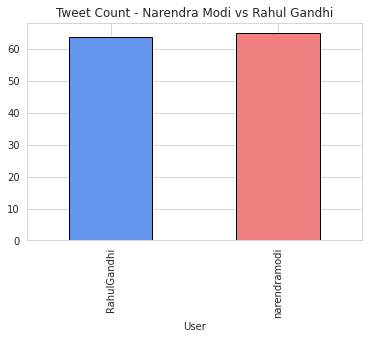

In [ ]:
dfNR.groupby(['User']).count().Tweet.plot(kind='bar',title='Tweet Count - Narendra Modi vs Rahul Gandhi',edgecolor='black',color=['cornflowerblue','lightcoral'])
plt.show()

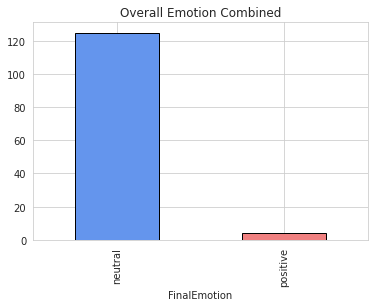

In [ ]:
dfNR.groupby(['FinalEmotion']).count().Tweet.plot(kind='bar',title='Overall Emotion Combined',edgecolor='black',color=['cornflowerblue','lightcoral'])
plt.show()

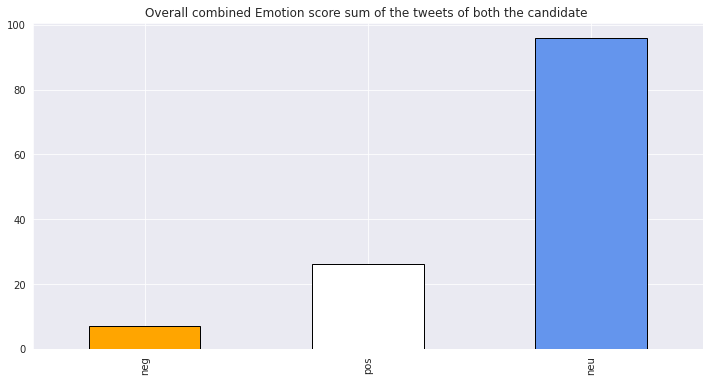

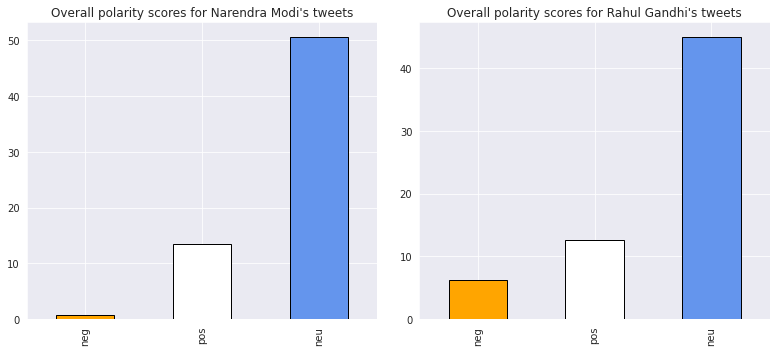

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))

dfNR[['neg','pos','neu']].sum().plot(kind='bar',title='Overall combined Emotion score sum of the tweets of both the candidate ',edgecolor='black',color=['orange','white','cornflowerblue'])
plt.show()

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
df_Modi[['neg','pos','neu']].sum().plot(kind='bar',title="Overall polarity scores for Narendra Modi's tweets",edgecolor='black',color=['orange','white','cornflowerblue'])

plt.subplot(1,2,2)
df_RG[['neg','pos','neu']].sum().plot(kind='bar',title="Overall polarity scores for Rahul Gandhi's tweets",edgecolor='black',color=['orange','white','cornflowerblue'])

plt.tight_layout()
plt.show()

So conclusion from above visualizations:

1. Both candidate have RELATIVELY same no. of tweets so we can assume somewhat same engagement from both sides.
2. Though if we see the negative polarity score is more for Rahul Gandhi's tweets than Narendra Modi's tweets, It may be beneficial for both the sides as RG is the leader of opposition and NaMo was present PM, But POSITIVE APPROACH OF MODI'S TWEETS MAY BE SLIGHTLY MORE THAN GANDHI'S NEGATIVE TWEETS.





---

---



# Tweet processing & analysis

## Tweets mentioning Namo & Rahul Gandhi

In [ ]:
# Tweets related to Modi

modi = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "chai wala","@narendramodi","#Vote4Modi"]
modi_df = pd.DataFrame(columns=["Date", "User","Tweet"])

modi = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "chai wala","@narendramodi","#Vote4Modi"]
modi_df = pd.DataFrame(columns=["Date", "User","Tweet"])

def ismodi(tweet):
    t = tweet.split()
  # print(t)
    for i in modi:
        if i in t:
            return True

# Here df is the main data
for row in df.values:
  # print(row)
  # print(row[3])
    if ismodi(str(row[2])):
    # print("true")
         modi_df = modi_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)

#modi_df.to_csv('TweetsRelatedToModi.csv')
modi_df

Date             User  \
0      2019-05-18 23:50:47+00:00  advosushildixit   
1      2019-05-18 23:00:03+00:00           jiaeur   
2      2019-05-18 22:53:54+00:00    PVenkatGandhi   
3      2019-05-18 22:20:48+00:00      TheNirbhay1   
4      2019-05-18 21:22:29+00:00      ShakeChilli   
...                          ...              ...   
25678  2019-04-09 12:06:31+00:00       shv_indian   
25679  2019-03-29 15:42:44+00:00       SONUPINKOO   
25680  2019-03-29 13:28:51+00:00       SONUPINKOO   
25681  2019-03-23 05:06:36+00:00       SONUPINKOO   
25682  2019-03-19 15:37:34+00:00    parthajit0101   

                                                   Tweet  
0      @anjanaomkashyap I am seeing you as future #bj...  
1      #LokSabhaElections2019 \n23rd May 2019 will re...  
2      #LokSabhaElections2019 \n23rd May 2019 will re...  
3      PM Modi creates a new record of being the only...  
4      @abhijitmajumder Appointment of Successor! \n\...  
...                                                  ...  
25678  #1DDrive #ModiSpeaksToNews18 #LokSabhaElection...  
25679  I am seriously worried about future of Indian ...  
25680  If @narendramodi is so Bad then Why does @INCI...  
25681  On this 23rd March (Pakistan Day), I Urge all ...  
25682  @timesofindia #ArvindKejriwal, #AAP sirji pls ...  

[25683 rows x 3 columns]

In [ ]:
modi_df['Tweet'].nunique()

25683

In [ ]:
# Rahul Related Tweets

rahul = ["rahul", "Rahul","RahulGandhi", "pappu", "gandhi","@RahulGandhi","Gandhi","#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi","shehzada"]

rahul_df = pd.DataFrame(columns=["Date", "User","Tweet"])

def israhul(tweet):
    t = tweet.split()
  # print(t)
    for i in rahul:
        if i in t:
            return True

for row in df.values:
  # print(row)
  # print(row[3])
    if israhul(str(row[2])):
    # print("true")
         rahul_df = rahul_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)

#rahul_df.to_csv('TweetsRelatedToRahul.csv')
rahul_df

Date             User  \
0      2019-05-18 19:49:52+00:00     Sunnysweet16   
1      2019-05-18 18:56:52+00:00    drnitinchaube   
2      2019-05-18 18:54:01+00:00        mrvivek07   
3      2019-05-18 18:52:03+00:00    JosephPravinP   
4      2019-05-18 18:31:10+00:00  VandanaMegastar   
...                          ...              ...   
14256  2019-03-23 04:53:54+00:00         SunjayJK   
14257  2019-03-17 08:53:28+00:00         SunjayJK   
14258  2019-03-06 10:20:09+00:00       RAMANKAIRA   
14259  2019-03-06 10:18:02+00:00       RAMANKAIRA   
14260  2019-03-06 10:11:43+00:00       RAMANKAIRA   

                                                   Tweet  
0      Wonder why no academic or journalist asks INC ...  
1      Congrats for the change #australiavotes2019 an...  
2      Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...  
3      @ajaymaken @RahulGandhi And as a final touch, ...  
4      #LokSabhaElections2019 Anyone not having mass ...  
...                                                  ...  
14256  @quizzicalguy In this #LokSabhaElections2019, ...  
14257  @AnumaVidisha @RahulGandhi @ArvindKejriwal whe...  
14258  @sherryontopp Early morning #political move af...  
14259  @mayankgandhi04 @mallesh_2004 Early morning #p...  
14260  @DrKumarVishwas Early morning #political move ...  

[14261 rows x 3 columns]

In [ ]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

modi_df['Tweet'] = modi_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rahul_df['Tweet'] = rahul_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

modi_df['Tweet'] = modi_df['Tweet'].apply(remove_punctuations)
rahul_df['Tweet'] = rahul_df['Tweet'].apply(remove_punctuations)

---
---

## Analyzing with VadarSentiment

In [ ]:
modi_df['pos'] = modi_df['Tweet'].apply(lambda x :pos(x))
modi_df['neg'] = modi_df['Tweet'].apply(lambda x :neg(x))
modi_df['neu'] = modi_df['Tweet'].apply(lambda x :neu(x))

In [ ]:
emotion=[]
for i in range(0,25683):
    emotion.append(max(modi_df['pos'][i],modi_df['neu'][i],modi_df['neg'][i]))

modi_df['FinalEmotion']=emotion

for i in range(0,25683):
    if modi_df['FinalEmotion'][i]==modi_df['pos'][i]:
        modi_df['FinalEmotion'][i]='positive'
    elif modi_df['FinalEmotion'][i]==modi_df['neg'][i]:
        modi_df['FinalEmotion'][i]='negative' 
    elif modi_df['FinalEmotion'][i]==modi_df['neu'][i]:
        modi_df['FinalEmotion'][i]='neutral'
modi_df

Date             User  \
0      2019-05-18 23:50:47+00:00  advosushildixit   
1      2019-05-18 23:00:03+00:00           jiaeur   
2      2019-05-18 22:53:54+00:00    PVenkatGandhi   
3      2019-05-18 22:20:48+00:00      TheNirbhay1   
4      2019-05-18 21:22:29+00:00      ShakeChilli   
...                          ...              ...   
25678  2019-04-09 12:06:31+00:00       shv_indian   
25679  2019-03-29 15:42:44+00:00       SONUPINKOO   
25680  2019-03-29 13:28:51+00:00       SONUPINKOO   
25681  2019-03-23 05:06:36+00:00       SONUPINKOO   
25682  2019-03-19 15:37:34+00:00    parthajit0101   

                                                   Tweet    pos    neg    neu  \
0      anjanaomkashyap I seeing future bjp spokespers...  0.307  0.000  0.693   
1      LokSabhaElections2019 23rd May 2019 reveal  Ev...  0.228  0.000  0.772   
2      LokSabhaElections2019 23rd May 2019 reveal  Ev...  0.228  0.000  0.772   
3      PM Modi creates new record PM democratic count...  0.313  0.000  0.687   
4      abhijitmajumder Appointment Successor God forb...  0.215  0.110  0.675   
...                                                  ...    ...    ...    ...   
25678  1DDrive ModiSpeaksToNews18 LokSabhaElections20...  0.000  0.136  0.864   
25679  I seriously worried future Indian democracy na...  0.276  0.109  0.615   
25680  If narendramodi Bad Why does INCIndia needs Ma...  0.000  0.156  0.844   
25681  On 23rd March Pakistan Day I Urge Indians Dere...  0.000  0.000  1.000   
25682  timesofindia ArvindKejriwal AAP sirji pls deci...  0.184  0.166  0.650   

      FinalEmotion  
0          neutral  
1          neutral  
2          neutral  
3          neutral  
4          neutral  
...            ...  
25678      neutral  
25679      neutral  
25680      neutral  
25681      neutral  
25682      neutral  

[25683 rows x 7 columns]

In [ ]:
# Total different emotion count
modi_df['FinalEmotion'].value_counts()

neutral     24994
positive      532
negative      157
Name: FinalEmotion, dtype: int64

In [ ]:
import plotly.express as px

fig = px.pie(modi_df, names='FinalEmotion', title='Emotions Distribution')
fig.show()

print("\n")
fig = px.pie(modi_df,values='pos', names='FinalEmotion', title='Emotions Distribution')
fig.show()


In [ ]:
# RaGa

In [ ]:
rahul_df['pos'] = rahul_df['Tweet'].apply(lambda x :pos(x))
rahul_df['neg'] = rahul_df['Tweet'].apply(lambda x :neg(x))
rahul_df['neu'] = rahul_df['Tweet'].apply(lambda x :neu(x))

In [ ]:
emotion=[]
for i in range(0,14261):
    emotion.append(max(rahul_df['pos'][i],rahul_df['neu'][i],rahul_df['neg'][i]))

rahul_df['FinalEmotion']=emotion

for i in range(0,14261):
    if rahul_df['FinalEmotion'][i]==rahul_df['pos'][i]:
        rahul_df['FinalEmotion'][i]='positive'
    elif rahul_df['FinalEmotion'][i]==rahul_df['neg'][i]:
        rahul_df['FinalEmotion'][i]='negative' 
    elif rahul_df['FinalEmotion'][i]==rahul_df['neu'][i]:
        rahul_df['FinalEmotion'][i]='neutral'
rahul_df

Date             User  \
0      2019-05-18 19:49:52+00:00     Sunnysweet16   
1      2019-05-18 18:56:52+00:00    drnitinchaube   
2      2019-05-18 18:54:01+00:00        mrvivek07   
3      2019-05-18 18:52:03+00:00    JosephPravinP   
4      2019-05-18 18:31:10+00:00  VandanaMegastar   
...                          ...              ...   
14256  2019-03-23 04:53:54+00:00         SunjayJK   
14257  2019-03-17 08:53:28+00:00         SunjayJK   
14258  2019-03-06 10:20:09+00:00       RAMANKAIRA   
14259  2019-03-06 10:18:02+00:00       RAMANKAIRA   
14260  2019-03-06 10:11:43+00:00       RAMANKAIRA   

                                                   Tweet    pos    neg    neu  \
0      Wonder academic journalist asks INC India Rahu...  0.093  0.138  0.769   
1      Congrats change australiavotes2019 ScottMorris...  0.152  0.000  0.848   
2      Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...  0.000  0.000  1.000   
3      ajaymaken RahulGandhi And final touch Modi ji ...  0.318  0.000  0.682   
4      LokSabhaElections2019 Anyone having mass backi...  0.083  0.088  0.828   
...                                                  ...    ...    ...    ...   
14256  quizzicalguy In LokSabhaElections2019 India Ec...  0.194  0.000  0.806   
14257  AnumaVidisha RahulGandhi ArvindKejriwal Spokes...  0.196  0.068  0.737   
14258  sherryontopp Early morning political detailed ...  0.097  0.000  0.903   
14259  mayankgandhi04 mallesh2004 Early morning polit...  0.094  0.000  0.906   
14260  DrKumarVishwas Early morning political detaile...  0.097  0.000  0.903   

      FinalEmotion  
0          neutral  
1          neutral  
2          neutral  
3          neutral  
4          neutral  
...            ...  
14256      neutral  
14257      neutral  
14258      neutral  
14259      neutral  
14260      neutral  

[14261 rows x 7 columns]

In [ ]:
# Total different emotion count
rahul_df['FinalEmotion'].value_counts()

neutral     13930
positive      225
negative      106
Name: FinalEmotion, dtype: int64

In [ ]:
# Total different emotion count
rahul_df['FinalEmotion'].value_counts()

neutral     14189
positive       58
negative       14
Name: FinalEmotion, dtype: int64

In [ ]:
fig = px.pie(rahul_df, names='FinalEmotion', title='Final empotions')
fig.show()

print("\n")
fig = px.pie(rahul_df,values='pos', names='FinalEmotion', title='Emotions Distribution')
fig.show()


## Using Flair

In [ ]:
!pip install flair

In [ ]:
rahul_df

Date             User  \
0      2019-05-18 19:49:52+00:00     Sunnysweet16   
1      2019-05-18 18:56:52+00:00    drnitinchaube   
2      2019-05-18 18:54:01+00:00        mrvivek07   
3      2019-05-18 18:52:03+00:00    JosephPravinP   
4      2019-05-18 18:31:10+00:00  VandanaMegastar   
...                          ...              ...   
14256  2019-03-23 04:53:54+00:00         SunjayJK   
14257  2019-03-17 08:53:28+00:00         SunjayJK   
14258  2019-03-06 10:20:09+00:00       RAMANKAIRA   
14259  2019-03-06 10:18:02+00:00       RAMANKAIRA   
14260  2019-03-06 10:11:43+00:00       RAMANKAIRA   

                                                   Tweet  
0      Wonder why no academic or journalist asks INC ...  
1      Congrats for the change #australiavotes2019 an...  
2      Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...  
3      @ajaymaken @RahulGandhi And as a final touch, ...  
4      #LokSabhaElections2019 Anyone not having mass ...  
...                                                  ...  
14256  @quizzicalguy In this #LokSabhaElections2019, ...  
14257  @AnumaVidisha @RahulGandhi @ArvindKejriwal whe...  
14258  @sherryontopp Early morning #political move af...  
14259  @mayankgandhi04 @mallesh_2004 Early morning #p...  
14260  @DrKumarVishwas Early morning #political move ...  

[14261 rows x 3 columns]

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

2022-11-12 08:54:19,820 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp590klbzm


100%|██████████| 265512723/265512723 [00:27<00:00, 9804209.57B/s] 

2022-11-12 08:54:47,767 copying /tmp/tmp590klbzm to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-11-12 08:54:48,652 removing temp file /tmp/tmp590klbzm
2022-11-12 08:54:48,743 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

In [ ]:
#rahul_df.drop(['pos', 'neg', 'neu', 'FinalEmotion'],axis=1,inplace=True)
#modi_df.drop(['pos', 'neg', 'neu', 'FinalEmotion'],axis=1,inplace=True)

In [ ]:
rahul_df['Emotion']=rahul_df['Tweet'].apply(flair_prediction)
rahul_df.to_csv("YoLoRaGaWaleTweets.csv")

In [ ]:
modi_df['Emotion']=modi_df['Tweet'].apply(flair_prediction)
modi_df.to_csv("YoLoModiWaleTweets.csv")

In [ ]:
modi_df = pd.read_csv('/content/drive/MyDrive/Graph_theory_and_social_networks/final_data/YoLoModiWaleTweets.csv')
rahul_df = pd.read_csv('/content/drive/MyDrive/Graph_theory_and_social_networks/final_data/YoLoRaGaWaleTweets.csv')

Unnamed: 0                       Date             User  \
0              0  2019-05-18 23:50:47+00:00  advosushildixit   
1              1  2019-05-18 23:00:03+00:00           jiaeur   
2              2  2019-05-18 22:53:54+00:00    PVenkatGandhi   
3              3  2019-05-18 22:20:48+00:00      TheNirbhay1   
4              4  2019-05-18 21:22:29+00:00      ShakeChilli   
...          ...                        ...              ...   
25683      25678  2019-04-09 12:06:31+00:00       shv_indian   
25684      25679  2019-03-29 15:42:44+00:00       SONUPINKOO   
25685      25680  2019-03-29 13:28:51+00:00       SONUPINKOO   
25686      25681  2019-03-23 05:06:36+00:00       SONUPINKOO   
25687      25682  2019-03-19 15:37:34+00:00    parthajit0101   

                                                   Tweet Emotion  
0      @anjanaomkashyap I am seeing you as future #bj...     neg  
1      #LokSabhaElections2019 \n23rd May 2019 will re...     neg  
2      #LokSabhaElections2019 \n23rd May 2019 will re...     neg  
3      PM Modi creates a new record of being the only...     pos  
4      @abhijitmajumder Appointment of Successor! \n\...     pos  
...                                                  ...     ...  
25683  #1DDrive #ModiSpeaksToNews18 #LokSabhaElection...     pos  
25684  I am seriously worried about future of Indian ...     pos  
25685  If @narendramodi is so Bad then Why does @INCI...     neg  
25686  On this 23rd March (Pakistan Day), I Urge all ...     neg  
25687  @timesofindia #ArvindKejriwal, #AAP sirji pls ...     neg  

[25688 rows x 5 columns]

Text(0.5, 1.0, 'Sentiments scores of Tweets about Modi')

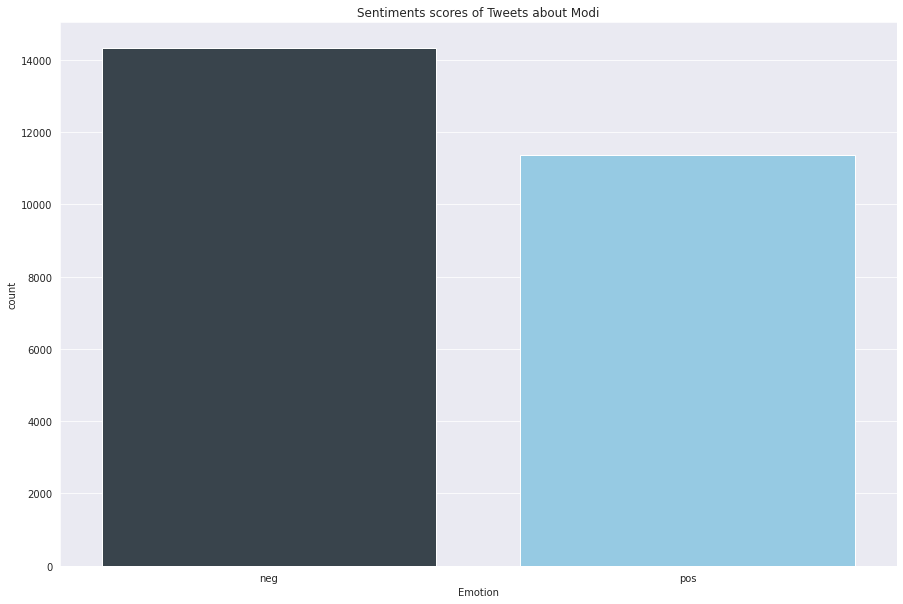

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['Emotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')

Text(0.5, 1.0, 'Sentiments scores of Tweets about Rahul Gandhi')

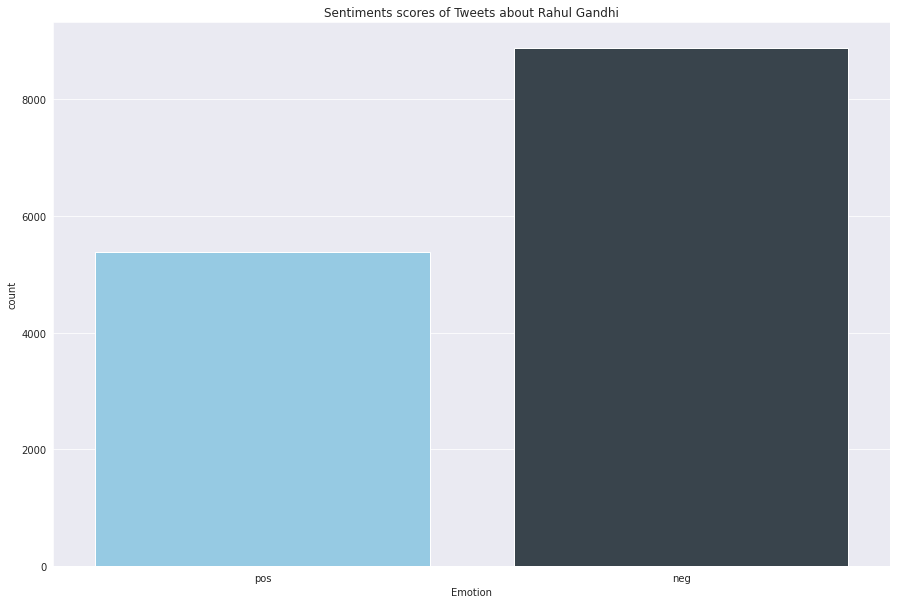

In [ ]:
#sns.countplot(data=rahul_df,x='Emotion')
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['Emotion'],palette=['#89CFF0','#36454F'])
ax.set_title('Sentiments scores of Tweets about Rahul Gandhi')

# Lets visulize the main data  using timestamp

## Data

In [ ]:
df

Date             User  \
0       2019-05-18 23:50:47+00:00  advosushildixit   
1       2019-05-18 23:20:00+00:00    airnewsalerts   
2       2019-05-18 23:00:03+00:00           jiaeur   
3       2019-05-18 22:53:54+00:00    PVenkatGandhi   
4       2019-05-18 22:20:48+00:00      TheNirbhay1   
...                           ...              ...   
142561  2019-03-06 10:18:02+00:00       RAMANKAIRA   
142562  2019-03-06 10:11:43+00:00       RAMANKAIRA   
142563  2019-01-24 12:57:48+00:00          thota_J   
142564  2019-01-24 12:48:37+00:00          thota_J   
142565  2019-01-24 12:47:55+00:00          thota_J   

                                                    Tweet  
0       @anjanaomkashyap I am seeing you as future #bj...  
1       Trinamool Congress Sitting MP Abhishek Banerje...  
2       #LokSabhaElections2019 \n23rd May 2019 will re...  
3       #LokSabhaElections2019 \n23rd May 2019 will re...  
4       PM Modi creates a new record of being the only...  
...                                                   ...  
142561  @mayankgandhi04 @mallesh_2004 Early morning #p...  
142562  @DrKumarVishwas Early morning #political move ...  
142563  CVoter predicts seat share for upcoming #LokSa...  
142564  CVoter predicts seat share for upcoming #LokSa...  
142565  CVoter predicts seat share for upcoming #LokSa...  

[142566 rows x 3 columns]

In [ ]:
df1=df.copy()

In [ ]:
NaMo_ref = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "chai wala","@narendramodi","#Vote4Modi"]
RaGa_ref = ["rahul", "Rahul","RahulGandhi", "pappu", "gandhi","@RahulGandhi","Gandhi","#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi","shehzada"]

In [ ]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['NaModi'] = df['Tweet'].apply(lambda x: identify_subject(x, NaMo_ref)) 
df['RaGandhi'] = df['Tweet'].apply(lambda x: identify_subject(x, RaGa_ref))
df.head(10)

Date             User  \
0  2019-05-18 23:50:47+00:00  advosushildixit   
1  2019-05-18 23:20:00+00:00    airnewsalerts   
2  2019-05-18 23:00:03+00:00           jiaeur   
3  2019-05-18 22:53:54+00:00    PVenkatGandhi   
4  2019-05-18 22:20:48+00:00      TheNirbhay1   
5  2019-05-18 22:16:26+00:00      ankitgarg20   
6  2019-05-18 21:51:56+00:00          pkm1999   
7  2019-05-18 21:43:15+00:00        rohanmodi   
8  2019-05-18 21:36:20+00:00         Jmend124   
9  2019-05-18 21:22:29+00:00      ShakeChilli   

                                               Tweet  NaModi  RaGandhi  
0  @anjanaomkashyap I am seeing you as future #bj...       1         0  
1  Trinamool Congress Sitting MP Abhishek Banerje...       1         0  
2  #LokSabhaElections2019 \n23rd May 2019 will re...       1         0  
3  #LokSabhaElections2019 \n23rd May 2019 will re...       1         0  
4  PM Modi creates a new record of being the only...       1         0  
5  My somewhat biased exit poll for India electio...       1         0  
6  @rupasubramanya Even assuming statistical erro...       0         0  
7  @abhijitmajumder Small correction. Nobody gets...       1         0  
8                We still fucking dancing 🕺🏼 ♏️ #INC       0         0  
9  @abhijitmajumder Appointment of Successor! \n\...       1         0

In [ ]:
df

Date             User  \
0       2019-05-18 23:50:47+00:00  advosushildixit   
1       2019-05-18 23:20:00+00:00    airnewsalerts   
2       2019-05-18 23:00:03+00:00           jiaeur   
3       2019-05-18 22:53:54+00:00    PVenkatGandhi   
4       2019-05-18 22:20:48+00:00      TheNirbhay1   
...                           ...              ...   
142561  2019-03-06 10:18:02+00:00       RAMANKAIRA   
142562  2019-03-06 10:11:43+00:00       RAMANKAIRA   
142563  2019-01-24 12:57:48+00:00          thota_J   
142564  2019-01-24 12:48:37+00:00          thota_J   
142565  2019-01-24 12:47:55+00:00          thota_J   

                                                    Tweet  NaModi  RaGandhi  
0       @anjanaomkashyap I am seeing you as future #bj...       1         0  
1       Trinamool Congress Sitting MP Abhishek Banerje...       1         0  
2       #LokSabhaElections2019 \n23rd May 2019 will re...       1         0  
3       #LokSabhaElections2019 \n23rd May 2019 will re...       1         0  
4       PM Modi creates a new record of being the only...       1         0  
...                                                   ...     ...       ...  
142561  @mayankgandhi04 @mallesh_2004 Early morning #p...       0         1  
142562  @DrKumarVishwas Early morning #political move ...       0         1  
142563  CVoter predicts seat share for upcoming #LokSa...       0         0  
142564  CVoter predicts seat share for upcoming #LokSa...       0         0  
142565  CVoter predicts seat share for upcoming #LokSa...       0         0  

[142566 rows x 5 columns]

In [ ]:
df=df[(df['NaModi']==1) | (df['RaGandhi']==1)]

In [ ]:
df

Date             User  \
0       2019-05-18 23:50:47+00:00  advosushildixit   
1       2019-05-18 23:20:00+00:00    airnewsalerts   
2       2019-05-18 23:00:03+00:00           jiaeur   
3       2019-05-18 22:53:54+00:00    PVenkatGandhi   
4       2019-05-18 22:20:48+00:00      TheNirbhay1   
...                           ...              ...   
142555  2019-03-19 15:37:34+00:00    parthajit0101   
142556  2019-03-17 08:53:28+00:00         SunjayJK   
142560  2019-03-06 10:20:09+00:00       RAMANKAIRA   
142561  2019-03-06 10:18:02+00:00       RAMANKAIRA   
142562  2019-03-06 10:11:43+00:00       RAMANKAIRA   

                                                    Tweet  NaModi  RaGandhi  
0       @anjanaomkashyap I am seeing you as future #bj...       1         0  
1       Trinamool Congress Sitting MP Abhishek Banerje...       1         0  
2       #LokSabhaElections2019 \n23rd May 2019 will re...       1         0  
3       #LokSabhaElections2019 \n23rd May 2019 will re...       1         0  
4       PM Modi creates a new record of being the only...       1         0  
...                                                   ...     ...       ...  
142555  @timesofindia #ArvindKejriwal, #AAP sirji pls ...       1         0  
142556  @AnumaVidisha @RahulGandhi @ArvindKejriwal whe...       1         1  
142560  @sherryontopp Early morning #political move af...       0         1  
142561  @mayankgandhi04 @mallesh_2004 Early morning #p...       0         1  
142562  @DrKumarVishwas Early morning #political move ...       0         1  

[78138 rows x 5 columns]

## Lets Preprocess

In [ ]:
df=df.reset_index()

In [ ]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df

Date             User  \
0      2019-05-18 23:50:47+00:00  advosushildixit   
1      2019-05-18 23:20:00+00:00    airnewsalerts   
2      2019-05-18 23:00:03+00:00           jiaeur   
3      2019-05-18 22:53:54+00:00    PVenkatGandhi   
4      2019-05-18 22:20:48+00:00      TheNirbhay1   
...                          ...              ...   
78133  2019-03-19 15:37:34+00:00    parthajit0101   
78134  2019-03-17 08:53:28+00:00         SunjayJK   
78135  2019-03-06 10:20:09+00:00       RAMANKAIRA   
78136  2019-03-06 10:18:02+00:00       RAMANKAIRA   
78137  2019-03-06 10:11:43+00:00       RAMANKAIRA   

                                                   Tweet  NaModi  RaGandhi  
0      @anjanaomkashyap I am seeing you as future #bj...       1         0  
1      Trinamool Congress Sitting MP Abhishek Banerje...       1         0  
2      #LokSabhaElections2019 \n23rd May 2019 will re...       1         0  
3      #LokSabhaElections2019 \n23rd May 2019 will re...       1         0  
4      PM Modi creates a new record of being the only...       1         0  
...                                                  ...     ...       ...  
78133  @timesofindia #ArvindKejriwal, #AAP sirji pls ...       1         0  
78134  @AnumaVidisha @RahulGandhi @ArvindKejriwal whe...       1         1  
78135  @sherryontopp Early morning #political move af...       0         1  
78136  @mayankgandhi04 @mallesh_2004 Early morning #p...       0         1  
78137  @DrKumarVishwas Early morning #political move ...       0         1  

[78138 rows x 5 columns]

In [ ]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
def preprocess_tweets(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    #processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x))
df.head()

Date             User  \
0  2019-05-18 23:50:47+00:00  advosushildixit   
1  2019-05-18 23:20:00+00:00    airnewsalerts   
2  2019-05-18 23:00:03+00:00           jiaeur   
3  2019-05-18 22:53:54+00:00    PVenkatGandhi   
4  2019-05-18 22:20:48+00:00      TheNirbhay1   

                                               Tweet  NaModi  RaGandhi  \
0  @anjanaomkashyap I am seeing you as future #bj...       1         0   
1  Trinamool Congress Sitting MP Abhishek Banerje...       1         0   
2  #LokSabhaElections2019 \n23rd May 2019 will re...       1         0   
3  #LokSabhaElections2019 \n23rd May 2019 will re...       1         0   
4  PM Modi creates a new record of being the only...       1         0   

                                     Processed Tweet  
0  @anjanaomkashyap I seeing future #bjp spokespe...  
1  Trinamool Congress Sitting MP Abhishek Banerje...  
2  #LokSabhaElections2019 23rd May 2019 reveal .....  
3  #LokSabhaElections2019 23rd May 2019 reveal .....  
4  PM Modi creates new record PM democratic count...

In [ ]:
df

Date             User  \
0      2019-05-18 23:50:47+00:00  advosushildixit   
1      2019-05-18 23:20:00+00:00    airnewsalerts   
2      2019-05-18 23:00:03+00:00           jiaeur   
3      2019-05-18 22:53:54+00:00    PVenkatGandhi   
4      2019-05-18 22:20:48+00:00      TheNirbhay1   
...                          ...              ...   
78133  2019-03-19 15:37:34+00:00    parthajit0101   
78134  2019-03-17 08:53:28+00:00         SunjayJK   
78135  2019-03-06 10:20:09+00:00       RAMANKAIRA   
78136  2019-03-06 10:18:02+00:00       RAMANKAIRA   
78137  2019-03-06 10:11:43+00:00       RAMANKAIRA   

                                                   Tweet  NaModi  RaGandhi  \
0      @anjanaomkashyap I am seeing you as future #bj...       1         0   
1      Trinamool Congress Sitting MP Abhishek Banerje...       1         0   
2      #LokSabhaElections2019 \n23rd May 2019 will re...       1         0   
3      #LokSabhaElections2019 \n23rd May 2019 will re...       1         0   
4      PM Modi creates a new record of being the only...       1         0   
...                                                  ...     ...       ...   
78133  @timesofindia #ArvindKejriwal, #AAP sirji pls ...       1         0   
78134  @AnumaVidisha @RahulGandhi @ArvindKejriwal whe...       1         1   
78135  @sherryontopp Early morning #political move af...       0         1   
78136  @mayankgandhi04 @mallesh_2004 Early morning #p...       0         1   
78137  @DrKumarVishwas Early morning #political move ...       0         1   

                                         Processed Tweet  
0      @anjanaomkashyap I seeing future #bjp spokespe...  
1      Trinamool Congress Sitting MP Abhishek Banerje...  
2      #LokSabhaElections2019 23rd May 2019 reveal .....  
3      #LokSabhaElections2019 23rd May 2019 reveal .....  
4      PM Modi creates new record PM democratic count...  
...                                                  ...  
78133  @timesofindia #ArvindKejriwal, #AAP sirji pls ...  
78134  @AnumaVidisha @RahulGandhi @ArvindKejriwal @Sp...  
78135  @sherryontopp Early morning #political move de...  
78136  @mayankgandhi04 @mallesh_2004 Early morning #p...  
78137  @DrKumarVishwas Early morning #political move ...  

[78138 rows x 6 columns]

In [ ]:
print('Base Tweet\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized Tweet\n', df['Processed Tweet'][0])

Base Tweet
 @anjanaomkashyap I am seeing you as future #bjp spokesperson..
Good luck. Anjana Om Modi oops Kashyap.
Journalists like you changed the meaning of journalism. Janta maaf nai karege

------------------------------------

Cleaned and lemmatized Tweet
 @anjanaomkashyap I seeing future #bjp spokesperson.. Good luck. Anjana Om Modi oops Kashyap. Journalists like changed meaning journalism. Janta maaf nai karege


## Calculate Sentiment

In [ ]:
df

Date             User  \
0      2019-05-18 23:50:47+00:00  advosushildixit   
1      2019-05-18 23:20:00+00:00    airnewsalerts   
2      2019-05-18 23:00:03+00:00           jiaeur   
3      2019-05-18 22:53:54+00:00    PVenkatGandhi   
4      2019-05-18 22:20:48+00:00      TheNirbhay1   
...                          ...              ...   
78133  2019-03-19 15:37:34+00:00    parthajit0101   
78134  2019-03-17 08:53:28+00:00         SunjayJK   
78135  2019-03-06 10:20:09+00:00       RAMANKAIRA   
78136  2019-03-06 10:18:02+00:00       RAMANKAIRA   
78137  2019-03-06 10:11:43+00:00       RAMANKAIRA   

                                                   Tweet  NaModi  RaGandhi  \
0      @anjanaomkashyap I am seeing you as future #bj...       1         0   
1      Trinamool Congress Sitting MP Abhishek Banerje...       1         0   
2      #LokSabhaElections2019 \n23rd May 2019 will re...       1         0   
3      #LokSabhaElections2019 \n23rd May 2019 will re...       1         0   
4      PM Modi creates a new record of being the only...       1         0   
...                                                  ...     ...       ...   
78133  @timesofindia #ArvindKejriwal, #AAP sirji pls ...       1         0   
78134  @AnumaVidisha @RahulGandhi @ArvindKejriwal whe...       1         1   
78135  @sherryontopp Early morning #political move af...       0         1   
78136  @mayankgandhi04 @mallesh_2004 Early morning #p...       0         1   
78137  @DrKumarVishwas Early morning #political move ...       0         1   

                                         Processed Tweet  
0      @anjanaomkashyap I seeing future #bjp spokespe...  
1      Trinamool Congress Sitting MP Abhishek Banerje...  
2      #LokSabhaElections2019 23rd May 2019 reveal .....  
3      #LokSabhaElections2019 23rd May 2019 reveal .....  
4      PM Modi creates new record PM democratic count...  
...                                                  ...  
78133  @timesofindia #ArvindKejriwal, #AAP sirji pls ...  
78134  @AnumaVidisha @RahulGandhi @ArvindKejriwal @Sp...  
78135  @sherryontopp Early morning #political move de...  
78136  @mayankgandhi04 @mallesh_2004 Early morning #p...  
78137  @DrKumarVishwas Early morning #political move ...  

[78138 rows x 6 columns]

In [ ]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'NaModi', 'RaGandhi', 'polarity', 'subjectivity']].head()

Processed Tweet  NaModi  RaGandhi  \
0  @anjanaomkashyap I seeing future #bjp spokespe...       1         0   
1  Trinamool Congress Sitting MP Abhishek Banerje...       1         0   
2  #LokSabhaElections2019 23rd May 2019 reveal .....       1         0   
3  #LokSabhaElections2019 23rd May 2019 reveal .....       1         0   
4  PM Modi creates new record PM democratic count...       1         0   

   polarity  subjectivity  
0  0.350000      0.362500  
1 -0.050000      0.083333  
2  0.800000      0.400000  
3  0.800000      0.400000  
4  0.468182      0.677273

In [ ]:
display(df[df['RaGandhi']==1][['RaGandhi','polarity','subjectivity']].groupby('RaGandhi').agg([np.mean, np.max, np.min, np.median]))
df[df['NaModi']==1][['NaModi','polarity','subjectivity']].groupby('NaModi').agg([np.mean, np.max, np.min, np.median])

## Visualise

In [ ]:
naModi = df[df['NaModi']==1][['Date', 'polarity']]
naModi = naModi.sort_values(by='Date', ascending=True)
naModi['MA Polarity'] = naModi.polarity.rolling(10, min_periods=3).mean()

raGandhi = df[df['RaGandhi']==1][['Date', 'polarity']]
raGandhi = raGandhi.sort_values(by='Date', ascending=True)
raGandhi['MA Polarity'] = raGandhi.polarity.rolling(10, min_periods=3).mean()

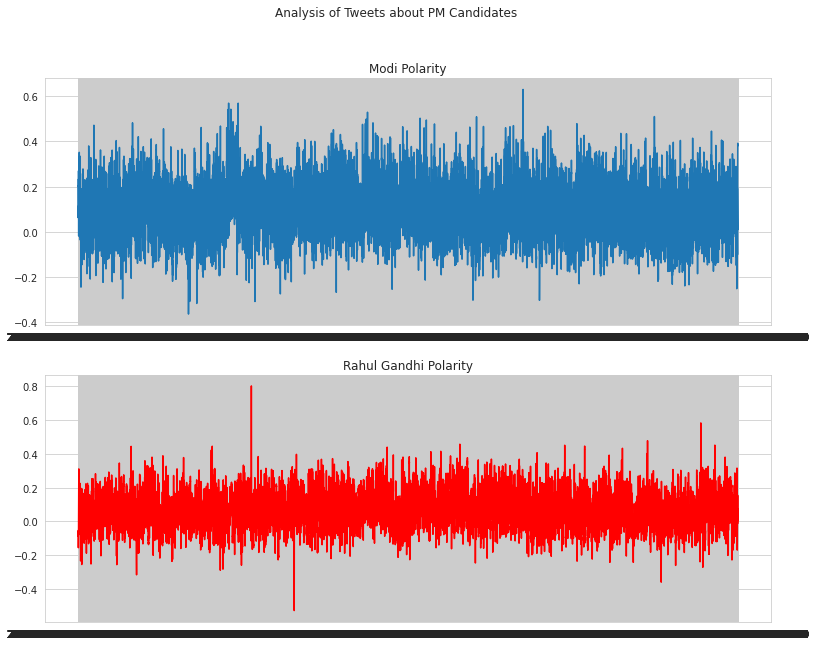

In [ ]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(naModi['Date'], naModi['MA Polarity'])
axes[0].set_title("\n".join(["Modi Polarity"]))
axes[1].plot(raGandhi['Date'], raGandhi['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Rahul Gandhi Polarity"]))

fig.suptitle("\n".join(["Analysis of Tweets about PM Candidates"]), y=0.98)

plt.show()

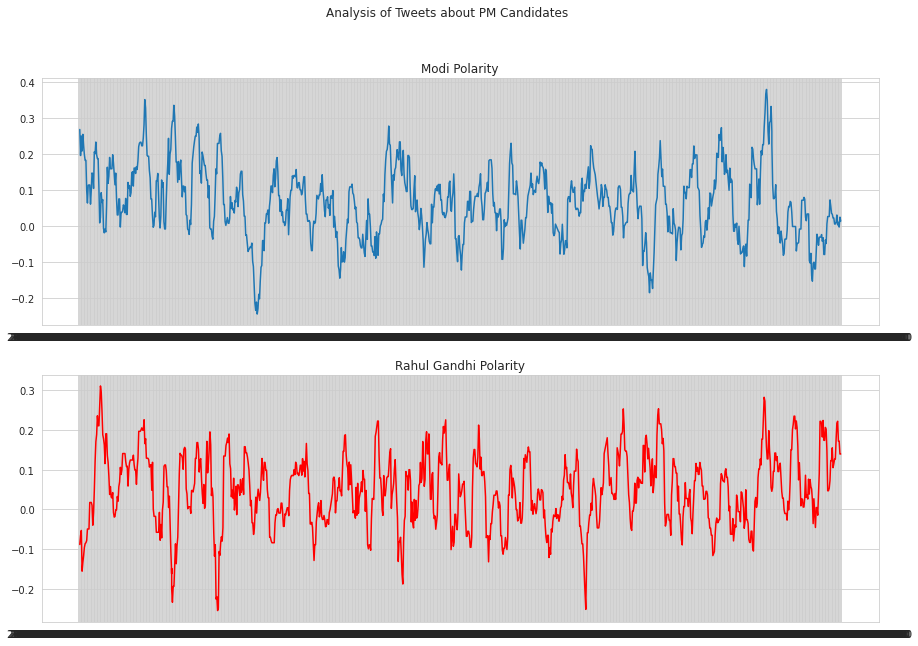

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(naModi['Date'][:1000], naModi['MA Polarity'][:1000])
axes[0].set_title("\n".join(["Modi Polarity"]))
axes[1].plot(raGandhi['Date'][:1000], raGandhi['MA Polarity'][:1000], color='red')
axes[1].set_title("\n".join(["Rahul Gandhi Polarity"]))

fig.suptitle("\n".join(["Analysis of Tweets about PM Candidates"]), y=0.98)

plt.show()